In [1]:
import pandas as pd
import numpy as np
from sklearn.covariance import GraphicalLassoCV
from matplotlib_venn import venn2  
import matplotlib.pyplot as plt 

In [ ]:
import numpy as np
import pandas as pd

matrix_AL = pd.read_csv(r'matrix_AL.csv', index_col=0)
matrix_BL = pd.read_csv(r'matrix_BL.csv', index_col=0)
matrix_AR = pd.read_csv(r'matrix_AR.csv', index_col=0)
matrix_BR = pd.read_csv(r'matrix_BR.csv', index_col=0)

# 初始化相关系数矩阵  
correlation_matrix_AL_BR = np.zeros((matrix_AL.shape[1], matrix_BR.shape[1]))  
correlation_matrix_AR_BL = np.zeros((matrix_AR.shape[1], matrix_BL.shape[1]))  

# 遍历AL矩阵的每一列  
for i in range(matrix_AL.shape[1]):  
    # 遍历BR矩阵的每一列  
    for j in range(matrix_BR.shape[1]):  
        # 计算两列之间的相关系数  
        correlation_coefficient = np.corrcoef(matrix_AL.iloc[:, i].values, matrix_BR.iloc[:, j].values)[0][1]  
        # 将计算出的相关系数存储在相关系数矩阵中  
        correlation_matrix_AL_BR[i, j] = correlation_coefficient  
  
# 遍历AR矩阵的每一列  
for i in range(matrix_AR.shape[1]):  
    # 遍历BR矩阵的每一列  
    for j in range(matrix_BL.shape[1]):  
        # 计算两列之间的相关系数  
        correlation_coefficient = np.corrcoef(matrix_AR.iloc[:, i].values, matrix_BL.iloc[:, j].values)[0][1]  
        # 将计算出的相关系数存储在相关系数矩阵中  
        correlation_matrix_AR_BL[i, j] = correlation_coefficient  

AL_BR = pd.DataFrame(correlation_matrix_AL_BR, columns=matrix_BR.columns, index=matrix_AL.columns)
AR_BL = pd.DataFrame(correlation_matrix_AR_BL, columns=matrix_BL.columns, index=matrix_AR.columns)
# print(AL_BR)

# 如果需要，可以将相关系数矩阵保存到CSV文件  
AL_BR.to_csv('AL_BR.csv')
AR_BL.to_csv('AR_BL.csv')



matrix_AL, matrix_BL = matrix_AL.align(matrix_BL, axis=1)

correlation_matrix = matrix_AL.T.corrwith(matrix_BL.T)

correlation_df = correlation_matrix.to_frame('Correlation')
print(correlation_df) 

correlation_square_matrix = matrix_AL.corr().reindex(index=matrix_BL.columns, columns=matrix_AL.columns)  
correlation_square_matrix = correlation_square_matrix.loc[matrix_BL.columns, :]
print('列与列之间的相关性')
print(correlation_square_matrix)

correlation_square_matrix.to_csv('AL_BL.csv')



matrix_AR, matrix_BR = matrix_AR.align(matrix_BR, axis=1)
correlation_square_matrix = matrix_AR.corr().reindex(index=matrix_BR.columns, columns=matrix_AR.columns)  
correlation_square_matrix = correlation_square_matrix.loc[matrix_BR.columns, :]
print('列与列之间的相关性')
print(correlation_square_matrix)

correlation_square_matrix.to_csv('AR_BR.csv')

In [ ]:
import numpy as np
import pandas as pd

matrix_AL_BL = pd.read_csv(r'AL_BL.csv',index_col=0)
matrix_AR_BR = pd.read_csv(r'AR_BR.csv',index_col=0)
matrix_AL_BR = pd.read_csv(r'AL_BR.csv',index_col=0)
matrix_AR_BL = pd.read_csv(r'AR_BL.csv',index_col=0)

ALBLARBL = [matrix_AL_BL,matrix_AR_BL]
ALBRARBR = [matrix_AL_BR,matrix_AR_BR]

matrix_AL_BL_AR_BL = pd.concat(ALBLARBL)
matrix_AL_BR_AR_BR = pd.concat(ALBRARBR)

AB_ALL = [matrix_AL_BL_AR_BL,matrix_AL_BR_AR_BR]
matrix_AB_ALL = pd.concat(AB_ALL, axis=1)

print(matrix_AB_ALL.shape)

matrix_AB_ALL.to_csv('AB_ALL.csv')



In [ ]:
import pandas as pd
import numpy as np
from sklearn.covariance import GraphicalLassoCV

glasso_cv = GraphicalLassoCV(alphas=4, cv=5, n_refinements=4)

matrix_ABALL = pd.read_csv(r'AB_ALL.csv',index_col=0)

glasso_cv.fit(matrix_ABALL)

precision_matrix = glasso_cv.precision_  
covariance_matrix = glasso_cv.covariance_

precision_matrix_CSV = pd.DataFrame(precision_matrix)
precision_matrix_CSV.to_csv('precision_matrix.csv')

print(precision_matrix)
print(precision_matrix.shape)

In [2]:
matrix_ABALL = pd.read_csv(r'AB_ALL.csv',index_col=0)
precision_matrix = pd.read_csv(r'precision_matrix.csv',index_col=0)

In [6]:
def is_symmetric(df):  
    return df.equals(df.T) 

In [7]:
print(is_symmetric(precision_matrix))

True


In [4]:
# precision_matrix.columns = matrix_ABALL.columns
# precision_matrix.index = matrix_ABALL.index

In [5]:
# precision_matrix.to_csv('precision_matrix.csv')

In [3]:
matrix_AL = pd.read_csv(r'matrix_AL.csv', index_col=0)
matrix_BL = pd.read_csv(r'matrix_BL.csv', index_col=0)
matrix_AR = pd.read_csv(r'matrix_AR.csv', index_col=0)
matrix_BR = pd.read_csv(r'matrix_BR.csv', index_col=0)

In [8]:
print(matrix_AL.shape, matrix_AR.shape,matrix_ABALL.shape)


(1418, 326) (1418, 323) (649, 649)


In [4]:
sub_precision = precision_matrix.iloc[:326, 326:]

In [5]:
print(sub_precision.shape)
print(type(sub_precision))
sub_precision.to_csv('sub_precision.csv')

(326, 323)
<class 'pandas.core.frame.DataFrame'>


In [6]:
nonzero_pairs = []  
for ligand in sub_precision.index:  
    for receptor in sub_precision.columns:  
        if sub_precision.at[ligand, receptor] != 0:  
            nonzero_pairs.append((ligand, receptor))  
nonzero_set = set(nonzero_pairs)
print(nonzero_set)
print(len(nonzero_set))

{('COL1A1', 'MUC6'), ('FN1', 'HRH1'), ('GSTP1', 'ITGA3'), ('COL3A1', 'ANTXR1'), ('FN1', 'NOTCH3'), ('C3', 'GJB2'), ('FGF2', 'CD300LF'), ('F12', 'F3'), ('SFTPD', 'MC1R'), ('COL1A2', 'PTK7'), ('C3', 'ITGA11'), ('COL3A1', 'MUC6'), ('NTN4', 'PTCH1'), ('C3', 'MUC6'), ('COL3A1', 'EDNRA'), ('LAMC2', 'ITGA11'), ('COL6A2', 'ITGA11'), ('LGALS3BP', 'ITGB4'), ('SERPINA1', 'MUC6'), ('COL3A1', 'SCTR'), ('C3', 'LSR'), ('COL1A2', 'HRH1'), ('SERPINE2', 'EPHB2'), ('F12', 'PLSCR4'), ('C3', 'CD74'), ('COL1A2', 'GJB2'), ('CSF1', 'TNFRSF10C'), ('LAMC2', 'LSR'), ('WNT4', 'IFITM1'), ('CEL', 'MUC6'), ('SERPINA1', 'CD74'), ('SPP1', 'MUC6'), ('COL6A2', 'CD74'), ('COL1A2', 'ITGA11'), ('GSTP1', 'CD74'), ('COL1A2', 'ANTXR1'), ('LAMC2', 'CD74'), ('COL3A1', 'ITGA6'), ('COL3A1', 'PTK7'), ('SPP1', 'CD74'), ('COL1A1', 'HRH1'), ('COL1A2', 'MUC6'), ('COL1A1', 'GJB2'), ('C3', 'ITGB4'), ('THBS2', 'GJB2'), ('PKM', 'ITGB4'), ('PDAP1', 'CD300LF'), ('COL4A5', 'CD48'), ('CSF1', 'CCR10'), ('SERPINA1', 'ITGB4'), ('LAMC2', 'TSPAN1'

In [5]:
LR_DF = pd.read_csv(r'lr_df.csv', index_col=0)
print(LR_DF.shape)

(1100, 4)


In [7]:
lr_pairs = set(zip(LR_DF['ligand'], LR_DF['receptor']))
print(len(lr_pairs))

1100


In [9]:
intersection = nonzero_set.intersection(lr_pairs)  
unique_to_nonzero = nonzero_set.difference(lr_pairs)  
unique_to_lr_df = lr_pairs.difference(nonzero_set)

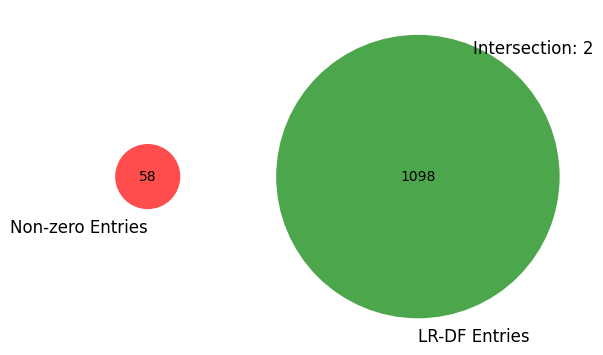

In [10]:


venn2([unique_to_nonzero, unique_to_lr_df], ('Non-zero Entries', 'LR-DF Entries'), alpha=0.7)
plt.text(0.5, 0.5, f"Intersection: {len(intersection)}", fontsize=12, ha='center', va='center')  
  
plt.show()

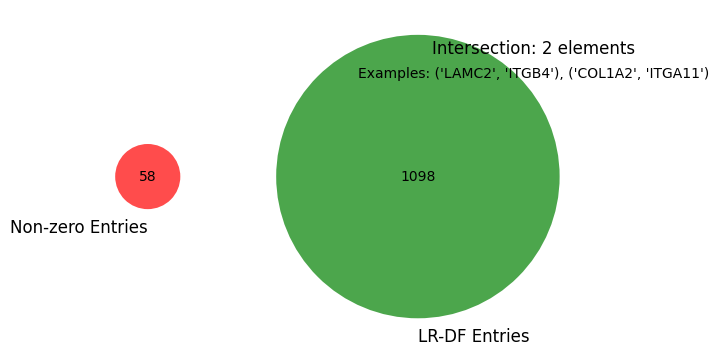

In [11]:

venn2([unique_to_nonzero, unique_to_lr_df], ('Non-zero Entries', 'LR-DF Entries'), alpha=0.7)  
  
 
plt.text(0.5, 0.5, f"Intersection: {len(intersection)} elements", fontsize=12, ha='center', va='center')  
  

if len(intersection) < 10:  
    intersection_list = list(intersection)  
    plt.text(0.5, 0.4, f"Examples: {', '.join([str(item) for item in intersection_list[:10]])}", fontsize=10, ha='center', va='center')  
  

plt.show()

In [12]:
sub_precision = pd.read_csv(r'sub_precision.csv', index_col=0)
ligand_receptor_matrix = pd.DataFrame(1, index=sub_precision.index, columns=sub_precision.columns, dtype=int)
for index, row in LR_DF.iterrows():  
    ligand = row['ligand']  
    receptor = row['receptor']  
    if ligand in ligand_receptor_matrix.index and receptor in ligand_receptor_matrix.columns:  
        ligand_receptor_matrix.at[ligand, receptor] = 0  
  
# 现在new_matrix就是在lr-df中出现的项为0，其余项为1的矩阵  
print(ligand_receptor_matrix)

        PLXNA3  PLXNA1  NRP1  NRP2  ADRA2A  MET  TNFRSF1A  SORT1  TNFRSF1B  \
SEMA3F       0       0     0     0       1    1         1      1         1   
HEBP1        1       1     1     1       0    1         1      1         1   
DCN          1       1     1     1       1    0         1      1         1   
GRN          1       1     1     1       1    1         0      0         0   
ICAM3        1       1     1     1       1    1         1      1         1   
...        ...     ...   ...   ...     ...  ...       ...    ...       ...   
APOC1        1       1     1     1       1    1         1      1         1   
NPNT         1       1     1     1       1    1         1      1         1   
SPON2        1       1     1     1       1    1         1      1         1   
VIM          1       1     1     1       1    1         1      1         1   
CXCL17       1       1     1     1       1    1         1      1         1   

        ITGAL  ...  TRPV6  CD247  NECTIN4  CD2  ADGRL4  TSPAN1 

In [13]:
receptor_ligand_matrix = ligand_receptor_matrix.T
print(receptor_ligand_matrix)

        SEMA3F  HEBP1  DCN  GRN  ICAM3  CEACAM1  EFNB1  SEMA4G  VCL  EFNA2  \
PLXNA3       0      1    1    1      1        1      1       1    1      1   
PLXNA1       0      1    1    1      1        1      1       1    1      1   
NRP1         0      1    1    1      1        1      1       1    1      1   
NRP2         0      1    1    1      1        1      1       1    1      1   
ADRA2A       1      0    1    1      1        1      1       1    1      1   
...        ...    ...  ...  ...    ...      ...    ...     ...  ...    ...   
TSPAN1       1      1    1    1      1        1      1       1    1      1   
VSIR         1      1    1    1      1        1      1       1    1      1   
CD72         1      1    1    1      1        1      1       1    1      1   
TRPM2        1      1    1    1      1        1      1       1    1      1   
GPR35        1      1    1    1      1        1      1       1    1      1   

        ...  CD59  ALOX5AP  PLTP  SPTBN2  NCAM1  APOC1  NPNT  S

In [13]:
ligand_ligand_matrix = pd.DataFrame(0, index=ligand_receptor_matrix.index, columns=receptor_ligand_matrix.columns)
receptor_receptor_matrix = pd.DataFrame(0, index=receptor_ligand_matrix.index, columns=ligand_receptor_matrix.columns) 
# print("Ligand-Ligand Matrix:")  
# print(ligand_ligand_matrix)

# print("Receptor-Receptor Matrix:")  
# print(receptor_receptor_matrix)

In [11]:
LL_sub_precision = precision_matrix.iloc[:326, :326]
RR_sub_precision = precision_matrix.iloc[326:, 326:]
print(LL_sub_precision.shape)
print(RR_sub_precision.shape)

(326, 326)
(323, 323)


In [16]:
ligand_ligand_matrix[LL_sub_precision.abs() >= 0.5] = 1
receptor_receptor_matrix[RR_sub_precision.abs() >= 0.5] = 1

print(ligand_ligand_matrix)
print(receptor_receptor_matrix)

        SEMA3F  HEBP1  DCN  GRN  ICAM3  CEACAM1  EFNB1  SEMA4G  VCL  EFNA2  \
SEMA3F       1      0    0    0      0        0      0       0    0      0   
HEBP1        0      1    0    0      0        0      0       0    0      0   
DCN          0      0    1    0      0        0      0       0    0      0   
GRN          0      0    0    1      0        0      0       0    0      0   
ICAM3        0      0    0    0      1        0      0       0    0      0   
...        ...    ...  ...  ...    ...      ...    ...     ...  ...    ...   
APOC1        0      0    0    0      0        0      0       0    0      0   
NPNT         0      0    0    0      0        1      0       0    0      0   
SPON2        0      0    0    0      0        0      0       0    0      0   
VIM          0      0    0    0      0        0      0       0    0      0   
CXCL17       0      0    0    0      0        0      0       0    0      0   

        ...  CD59  ALOX5AP  PLTP  SPTBN2  NCAM1  APOC1  NPNT  S

In [18]:
LLLR = [ligand_ligand_matrix,ligand_receptor_matrix]
RLRR = [receptor_ligand_matrix,receptor_receptor_matrix]
matrix_penalty_up = pd.concat(LLLR, axis=1)
matrix_penalty_down = pd.concat(RLRR, axis=1)

penalty_matrix = pd.concat([matrix_penalty_up,matrix_penalty_down])
print(penalty_matrix.shape)
penalty_matrix.to_csv('penalty_matrix.csv')
# print(matrix_penalty_up.shape)

(649, 649)


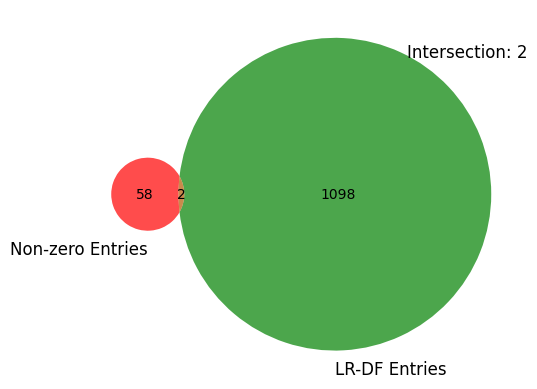

In [12]:
venn2([nonzero_set, lr_pairs], ('Non-zero Entries', 'LR-DF Entries'), alpha=0.7)
plt.text(0.5, 0.5, f"Intersection: {len(intersection)}", fontsize=12, ha='center', va='center')  
  
plt.show()

In [8]:
precision_matrix_R = pd.read_csv(r'wi_penalty_matrix.csv',index_col=0)
sub_precision_R = precision_matrix_R.iloc[:326, 326:]
print(sub_precision_R.shape)
print(type(sub_precision_R))
sub_precision_R.to_csv('sub_precision_R.csv')

(326, 323)
<class 'pandas.core.frame.DataFrame'>


In [9]:
print(is_symmetric(precision_matrix_R))

False


In [34]:
zero_pairs_r = []  
for ligand in sub_precision_R.index:  
    for receptor in sub_precision_R.columns:  
        if sub_precision_R.at[ligand, receptor] == 0:  
            zero_pairs_r.append((ligand, receptor))  
zero_set_r = set(zero_pairs_r)
print(zero_set_r)
print(len(zero_set_r))

{('FGF2', 'CD44'), ('VEGFA', 'NRP2'), ('VCAM1', 'MSN'), ('PDAP1', 'PDGFRB'), ('COL9A2', 'ITGB1'), ('PDGFD', 'PDGFRA'), ('LGALS1', 'ITGB1'), ('SFTPD', 'LY96'), ('TGM2', 'ITGA9'), ('ARF6', 'PLD1'), ('AFDN', 'EPHB6'), ('SERPINA1', 'LRP1'), ('LAMC2', 'ITGA2'), ('EFNB2', 'EPHB2'), ('CRP', 'OLR1'), ('COL1A1', 'CD93'), ('JAG1', 'CD46'), ('TIMP2', 'CD44'), ('TNFSF10', 'TNFRSF10A'), ('COL3A1', 'DDR2'), ('EFNA5', 'EPHA1'), ('APP', 'APLP1'), ('JAG2', 'NOTCH1'), ('SELPLG', 'SELP'), ('SEMA7A', 'ITGA1'), ('COL1A2', 'ITGA2'), ('SERPINE1', 'ITGAV'), ('CD99', 'PILRA'), ('WNT4', 'SMO'), ('C1QB', 'C1QBP'), ('THBS1', 'ITGB1'), ('WNT7B', 'LRP5'), ('PDGFD', 'PDGFRB'), ('COL11A1', 'ITGA2'), ('FGF7', 'FGFR3'), ('IL16', 'GRIN2A'), ('FGF8', 'FGFR2'), ('SEMA4A', 'PLXNB1'), ('HGF', 'MET'), ('VIM', 'CD44'), ('MFNG', 'NOTCH2'), ('CDH1', 'ITGB7'), ('AGRN', 'LRP1'), ('EFNB1', 'EPHB2'), ('SERPINE1', 'PLAUR'), ('NPNT', 'ITGB1'), ('FGA', 'ITGA5'), ('INHBA', 'ACVR1B'), ('TIMP2', 'ITGB1'), ('LAMA3', 'ITGB1'), ('FN1', 'ITG

In [35]:
intersection_R = zero_set_r.intersection(lr_pairs)  
unique_to_zero_R = zero_set_r.difference(lr_pairs)  
unique_to_lr_df_R = lr_pairs.difference(zero_set_r)

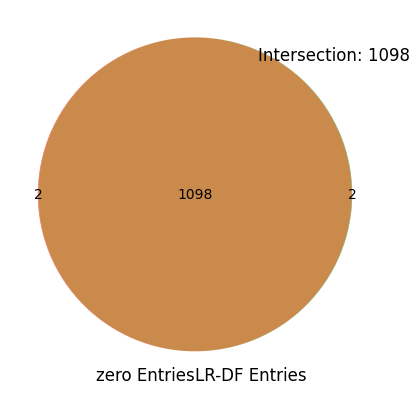

In [36]:
venn2([zero_set_r, lr_pairs], ('zero Entries', 'LR-DF Entries'), alpha=0.7)
plt.text(0.5, 0.5, f"Intersection: {len(intersection_R)}", fontsize=12, ha='center', va='center')  
  
plt.show()

In [5]:
precision_matrix_R_thr = pd.read_csv(r'wi_penalty_matrix_maxit100_thr01.csv',index_col=0)
sub_precision_R_thr = precision_matrix_R_thr.iloc[:326, 326:]
print(sub_precision_R_thr.shape)
print(type(sub_precision_R_thr))
sub_precision_R_thr.to_csv('sub_precision_R_thr.csv')

(326, 323)
<class 'pandas.core.frame.DataFrame'>


{('COL1A1', 'ITGA11'), ('LAMC3', 'ITGB1'), ('LAMB2', 'ITGB4'), ('VEGFA', 'NRP2'), ('HSP90AA1', 'FGFR3'), ('LAMC1', 'ITGA1'), ('CALM1', 'KCNQ1'), ('CXCL8', 'ACKR1'), ('JAG2', 'NOTCH3'), ('COL4A1', 'ITGA1'), ('ADM', 'RAMP1'), ('INS', 'INSR'), ('CXCL17', 'GPR35'), ('PLTP', 'ABCA1'), ('LTB', 'CD40'), ('GNAI2', 'ADORA1'), ('SELPLG', 'ESAM'), ('B2M', 'CD3D'), ('PLAT', 'LRP1'), ('ADAM15', 'ITGB1'), ('ICAM2', 'ITGAL'), ('CCL5', 'SDC1'), ('FGA', 'PLAUR'), ('FN1', 'ITGA3'), ('TNFSF9', 'PVR'), ('MFGE8', 'ITGAV'), ('SEMA4D', 'PLXNB2'), ('FGF2', 'FGFR3'), ('CEACAM1', 'CD209'), ('LAMA1', 'ITGA1'), ('PROS1', 'TYRO3'), ('COL4A1', 'CD47'), ('S100B', 'AGER'), ('FN1', 'ROBO4'), ('APOC1', 'VLDLR'), ('AGT', 'ADRA2A'), ('LAMA2', 'ITGA7'), ('POMC', 'VIPR1'), ('HSP90B1', 'TLR1'), ('ADAM10', 'AXL'), ('COL16A1', 'ITGB1'), ('ADAM9', 'ITGB5'), ('S100A10', 'TRPV6'), ('APP', 'CAV1'), ('IL18', 'IL18RAP'), ('TGFB1', 'CXCR4'), ('LYPD3', 'AGR2'), ('LAMC2', 'CD151'), ('APOE', 'LRP1'), ('CD14', 'ITGB1'), ('C4BPA', 'CD40'

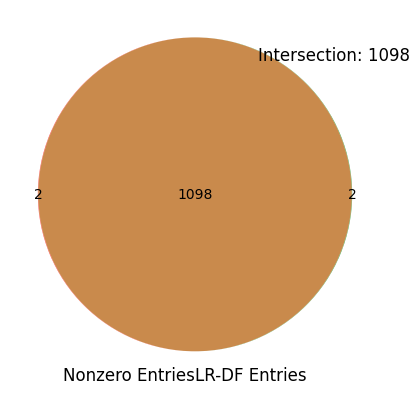

In [8]:
zero_pairs_r_thr = []  
for ligand in sub_precision_R_thr.index:  
    for receptor in sub_precision_R_thr.columns:  
        if sub_precision_R_thr.at[ligand, receptor] != 0:  
            zero_pairs_r_thr.append((ligand, receptor))  
zero_set_r_thr = set(zero_pairs_r_thr)
print(zero_set_r_thr)
print(len(zero_set_r_thr))
intersection_R_thr = zero_set_r_thr.intersection(lr_pairs)  
unique_to_zero_R_thr = zero_set_r_thr.difference(lr_pairs)  
unique_to_lr_df_R_thr = lr_pairs.difference(zero_set_r_thr)
venn2([zero_set_r_thr, lr_pairs], ('Nonzero Entries', 'LR-DF Entries'), alpha=0.7)
plt.text(0.5, 0.5, f"Intersection: {len(intersection_R_thr)}", fontsize=12, ha='center', va='center')  
  
plt.show()

Text(0.5, 0.5, 'Intersection: 1100')

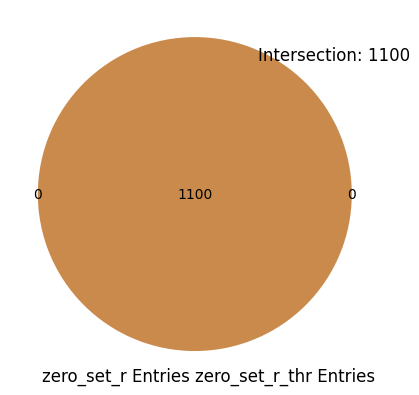

In [40]:
intersection_penalty = zero_set_r.intersection(zero_set_r_thr)  
unique_to__penalty_r = zero_set_r.difference(zero_set_r_thr)  
unique_to__penalty_r_thr = zero_set_r_thr.difference(zero_set_r)
venn2([zero_set_r, zero_set_r_thr], ('zero_set_r Entries ', 'zero_set_r_thr Entries'), alpha=0.7)
plt.text(0.5, 0.5, f"Intersection: {len(intersection_penalty)}", fontsize=12, ha='center', va='center')  

In [9]:
ADATA_META = pd.read_csv(r'adata_meta.csv',index_col=0)
print(ADATA_META.shape)

(428, 4)


In [21]:
precision_score = []  
for ligand in sub_precision_R_thr.index:  
    for receptor in sub_precision_R_thr.columns:  
        if sub_precision_R_thr.at[ligand, receptor] != 0:  
            precision_score.append((ligand, receptor,sub_precision_R_thr.at[ligand, receptor]))  
# print(precision_score)
# print(len(precision_score))

precision_score.sort(key= lambda x : x[-1])
print(precision_score)
 
df = pd.DataFrame(precision_score, columns=['ligand', 'receptor', 'score'])  
  
df.to_csv('precision_score.csv', index=False)

[('CCL5', 'CCRL2', -0.0701092149138551), ('NTN4', 'UNC5A', -0.0641793641344747), ('LRPAP1', 'SORT1', -0.052056457914303), ('LRPAP1', 'LRP8', -0.0437704861048314), ('B2M', 'CD3G', -0.0391305189710607), ('COL1A2', 'ITGA11', -0.0353399387334278), ('LRPAP1', 'VLDLR', -0.0314961094667449), ('CCL5', 'ACKR1', -0.0307452505257378), ('LAMB3', 'ITGB4', -0.0301530172638229), ('EFNB1', 'EPHB6', -0.0300934394165308), ('DKK1', 'LRP6', -0.0294795198076964), ('ADAM10', 'MET', -0.0288170134389191), ('FN1', 'SDC2', -0.0281703389426319), ('C3', 'CD81', -0.0269177061459915), ('GDF11', 'ACVR1B', -0.0267162981990305), ('COL1A1', 'ITGA11', -0.0261571700615129), ('EFNA3', 'EPHA3', -0.0259981909303608), ('FGF2', 'FGFRL1', -0.0258757845688057), ('TNF', 'TNFRSF1B', -0.0254539990349026), ('EFNA4', 'EPHA2', -0.0252271629085357), ('TNC', 'ITGB6', -0.024762552913716), ('HBEGF', 'ERBB2', -0.0247065432200734), ('GNAI2', 'S1PR4', -0.0244441245065386), ('THBS2', 'NOTCH3', -0.0239773331150394), ('EFNA5', 'EPHA3', -0.0234

In [10]:
precision_score_sort = pd.read_csv(r'precision_score.csv',index_col=0)
print(precision_score_sort.head(10))

       receptor     score
ligand                   
CCL5      CCRL2 -0.070109
NTN4      UNC5A -0.064179
LRPAP1    SORT1 -0.052056
LRPAP1     LRP8 -0.043770
B2M        CD3G -0.039131
COL1A2   ITGA11 -0.035340
LRPAP1    VLDLR -0.031496
CCL5      ACKR1 -0.030745
LAMB3     ITGB4 -0.030153
EFNB1     EPHB6 -0.030093


In [11]:
precision_score_sort = pd.read_csv(r'precision_score.csv',index_col=0)
print(precision_score_sort.tail(10))

         receptor     score
ligand                     
HLA-B       KLRD1  0.013207
VCAM1         EZR  0.013216
LAMA2       ITGA3  0.013630
LRPAP1       LDLR  0.013828
PPY        ADRA2A  0.013839
SERPINA1     LRP1  0.014291
CCL5         SDC4  0.014640
APOE          LSR  0.015130
C3           LRP1  0.015520
FGA         PLAUR  0.016307


In [12]:
LR_DF = pd.read_csv(r'lr_df.csv', index_col=0)
print(LR_DF.shape)

precision_score_sort = pd.read_csv(r'precision_score.csv',index_col=0)
print(precision_score_sort.shape)

precision_intersection = pd.merge(LR_DF, precision_score_sort, on=['ligand', 'receptor'])  

 
print(precision_intersection)  

(1100, 4)
(1100, 2)
      ligand receptor species  score_x   score_y
0     SEMA3F   PLXNA3   Human        1 -0.013023
1     SEMA3F   PLXNA1   Human        1  0.008597
2     SEMA3F     NRP1   Human        1 -0.004146
3     SEMA3F     NRP2   Human        1  0.006181
4      HEBP1   ADRA2A   Human        1  0.000815
...      ...      ...     ...      ...       ...
1093   NCAM1    FGFR2   Human        1  0.001483
1094  CXCL17    GPR35   Human        1  0.006050
1095   NCAM1    ROBO1   Human        1  0.001353
1096   SLIT2    ROBO1   Human        1 -0.000458
1097     B2M     CD3G   Human        1 -0.039131

[1098 rows x 5 columns]


In [13]:
precision_intersection_sorted = precision_intersection.sort_values(by='score_y')  
precision_intersection_sorted.to_csv('precision_intersection_sorted.csv', index=False)
print(precision_intersection_sorted)

        ligand receptor species  score_x   score_y
1009      CCL5    CCRL2   Human        1 -0.070109
987       NTN4    UNC5A   Human        1 -0.064179
710     LRPAP1    SORT1   Human        1 -0.052056
943     LRPAP1     LRP8   Human        1 -0.043770
1097       B2M     CD3G   Human        1 -0.039131
...        ...      ...     ...      ...       ...
666   SERPINA1     LRP1   Human        1  0.014291
1043      CCL5     SDC4   Human        1  0.014640
168       APOE      LSR   Human        1  0.015130
675         C3     LRP1   Human        1  0.015520
407        FGA    PLAUR   Human        1  0.016307

[1098 rows x 5 columns]


In [14]:
precision_intersection_sorted = pd.read_csv(r'precision_intersection_sorted.csv')
print(precision_intersection_sorted.head(10))
print(precision_intersection_sorted.tail(10))


   ligand receptor species  score_x   score_y
0    CCL5    CCRL2   Human        1 -0.070109
1    NTN4    UNC5A   Human        1 -0.064179
2  LRPAP1    SORT1   Human        1 -0.052056
3  LRPAP1     LRP8   Human        1 -0.043770
4     B2M     CD3G   Human        1 -0.039131
5  COL1A2   ITGA11   Human        1 -0.035340
6  LRPAP1    VLDLR   Human        1 -0.031496
7    CCL5    ACKR1   Human        1 -0.030745
8   LAMB3    ITGB4   Human        1 -0.030153
9   EFNB1    EPHB6   Human        1 -0.030093
        ligand receptor species  score_x   score_y
1088     HLA-B    KLRD1   Human        1  0.013207
1089     VCAM1      EZR   Human        1  0.013216
1090     LAMA2    ITGA3   Human        1  0.013630
1091    LRPAP1     LDLR   Human        1  0.013828
1092       PPY   ADRA2A   Human        1  0.013839
1093  SERPINA1     LRP1   Human        1  0.014291
1094      CCL5     SDC4   Human        1  0.014640
1095      APOE      LSR   Human        1  0.015130
1096        C3     LRP1   Human    

(428, 4)
        cell   x   y          celltype
0    CC10x10  10  10  TDuct_epithelium
1    CC10x13  10  13  TDuct_epithelium
2    CC10x14  10  14  TDuct_epithelium
3    CC10x15  10  15  TDuct_epithelium
4    CC10x16  10  16  TDuct_epithelium
..       ...  ..  ..               ...
423   CC9x29   9  29  TDuct_epithelium
424   CC9x30   9  30  TDuct_epithelium
425   CC9x31   9  31           TStroma
426   CC9x32   9  32           TStroma
427   CC9x33   9  33    TCancer_region

[428 rows x 4 columns]


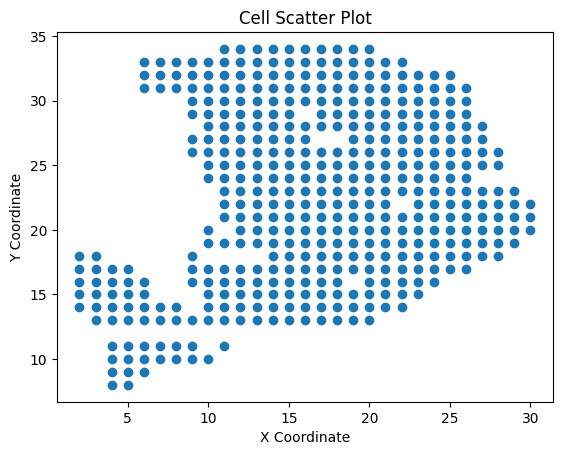

In [41]:
# 读取CSV文件  
ADATA_META = pd.read_csv(r'adata_meta.csv',index_col=0)
print(ADATA_META.shape)
print(ADATA_META)
 
# 绘制散点图  
plt.scatter(ADATA_META['x'], ADATA_META['y'])  
 
# # 为每个点添加细胞名标签  
# for i, txt in enumerate(ADATA_META['cell']):  
#     plt.annotate(txt, (ADATA_META['x'][i], ADATA_META['y'][i]))  
 
# 设置图表标题和坐标轴标签  
plt.title('Cell Scatter Plot')  
plt.xlabel('X Coordinate')  
plt.ylabel('Y Coordinate')  
 
# 显示图表  
plt.show()

In [45]:
gene_expression_avg_AL = matrix_AL.groupby('cell').mean().reset_index()
print(gene_expression_avg_AL.shape)
print(gene_expression_avg_AL)

gene_expression_avg_AL.to_csv('gene_expression_avg_AL.csv')


(428, 327)
       cell     SEMA3F  HEBP1         DCN         GRN  ICAM3  CEACAM1  \
0    C10x10   16.54716    0.0  104.798676   82.735794    0.0      0.0   
1    C10x13    0.00000    0.0    0.000000   25.773195    0.0      0.0   
2    C10x14    0.00000    0.0   34.246574   68.493150    0.0      0.0   
3    C10x15    0.00000    0.0    0.000000  522.875800    0.0      0.0   
4    C10x16    0.00000    0.0   71.428566    0.000000    0.0      0.0   
..      ...        ...    ...         ...         ...    ...      ...   
423   C9x29    0.00000    0.0   42.194090  126.582275    0.0      0.0   
424   C9x30    0.00000    0.0    0.000000    0.000000    0.0      0.0   
425   C9x31    0.00000    0.0    0.000000    0.000000    0.0      0.0   
426   C9x32    0.00000    0.0    0.000000    0.000000    0.0      0.0   
427   C9x33  370.37036    0.0    0.000000    0.000000    0.0      0.0   

         EFNB1  SEMA4G        VCL  ...       CD59   ALOX5AP       PLTP  \
0     0.000000     0.0    5.51572  ...

In [50]:
ADATA_META['cell'] = ADATA_META['cell'].str.replace('CC', 'C')  
ADATA_META.to_csv('adata_meta_modify.csv')

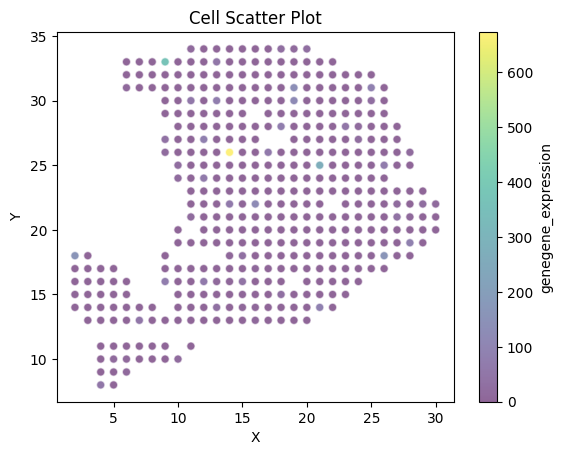

In [60]:
ADATA_META = pd.read_csv(r'adata_meta_modify.csv',index_col=0)
gene_expression_avg_AL = pd.read_csv(r'gene_expression_avg_AL.csv',index_col=0)
# print(gene_expression_avg_AL.shape)
# print(gene_expression_avg_AL)
merged_data_AL = pd.merge(ADATA_META,gene_expression_avg_AL,on='cell')
# print(merged_data.shape)
# print(merged_data)
plt.scatter(merged_data_AL['x'], merged_data_AL['y'], c=merged_data_AL['SEMA3F'], cmap='viridis', alpha=0.6, edgecolors='w')  
  
# 添加标题和坐标轴标签  
plt.title('Cell Scatter Plot')  
plt.xlabel('X')  
plt.ylabel('Y')  
plt.colorbar(label='genegene_expression')  # 添加颜色条以显示颜色与基因表达值的对应关系  
  
# 显示图表  
plt.show()

In [55]:
gene_expression_avg_AR = matrix_AR.groupby('cell').mean().reset_index()
gene_expression_avg_AR.to_csv('gene_expression_avg_AR.csv')

In [56]:
gene_expression_avg_AR = pd.read_csv(r'gene_expression_avg_AR.csv',index_col=0)
print(gene_expression_avg_AR.shape)
print(gene_expression_avg_AR)

(428, 324)
       cell  PLXNA3  PLXNA1  NRP1       NRP2     ADRA2A  MET    TNFRSF1A  \
0    C10x10     0.0     0.0   0.0   0.000000   0.000000  0.0   44.125760   
1    C10x13     0.0     0.0   0.0   0.000000  25.773195  0.0  103.092780   
2    C10x14     0.0     0.0   0.0  34.246574   0.000000  0.0    0.000000   
3    C10x15     0.0     0.0   0.0   0.000000   0.000000  0.0    0.000000   
4    C10x16     0.0     0.0   0.0   0.000000   0.000000  0.0   71.428566   
..      ...     ...     ...   ...        ...        ...  ...         ...   
423   C9x29     0.0     0.0   0.0   0.000000   0.000000  0.0    0.000000   
424   C9x30     0.0     0.0   0.0   0.000000   0.000000  0.0    0.000000   
425   C9x31     0.0     0.0   0.0   0.000000   0.000000  0.0    0.000000   
426   C9x32     0.0     0.0   0.0   0.000000   0.000000  0.0    0.000000   
427   C9x33     0.0     0.0   0.0   0.000000   0.000000  0.0    0.000000   

        SORT1  TNFRSF1B  ...      TRPV6      CD247  NECTIN4  CD2  ADGRL4  \


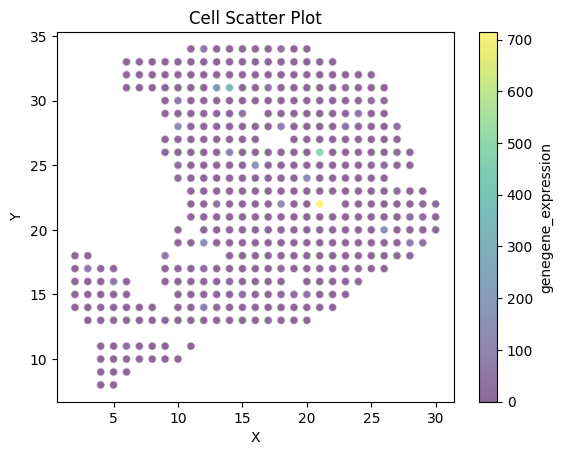

In [61]:
merged_data_AR = pd.merge(ADATA_META,gene_expression_avg_AR,on='cell')
# print(merged_data.shape)
# print(merged_data)
plt.scatter(merged_data_AR['x'], merged_data_AR['y'], c=merged_data_AR['PLXNA3'], cmap='viridis', alpha=0.6, edgecolors='w')  
  
# 添加标题和坐标轴标签  
plt.title('Cell Scatter Plot')  
plt.xlabel('X')  
plt.ylabel('Y')  
plt.colorbar(label='genegene_expression')  # 添加颜色条以显示颜色与基因表达值的对应关系  
  
# 显示图表  
plt.show()

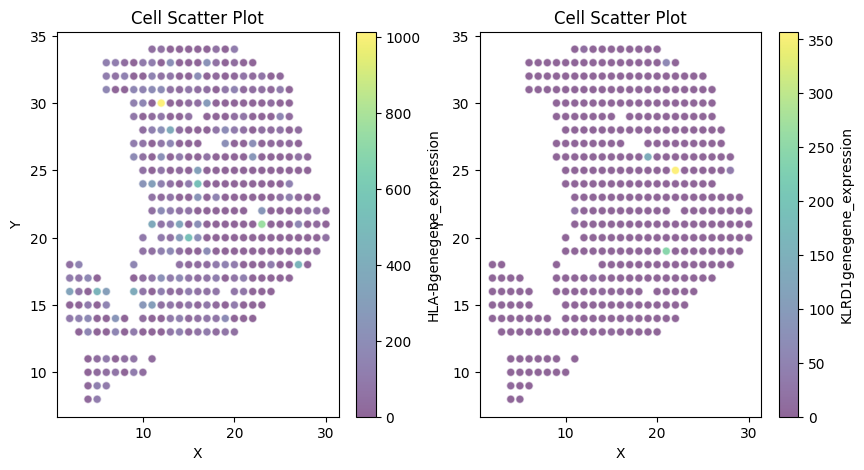

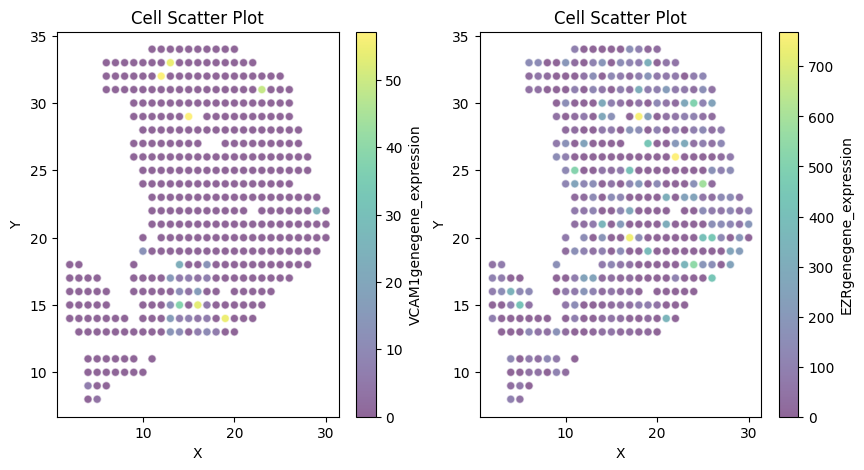

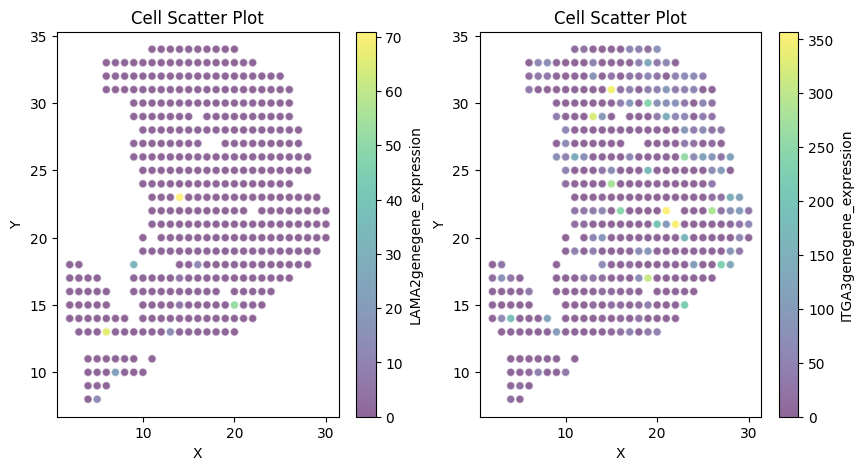

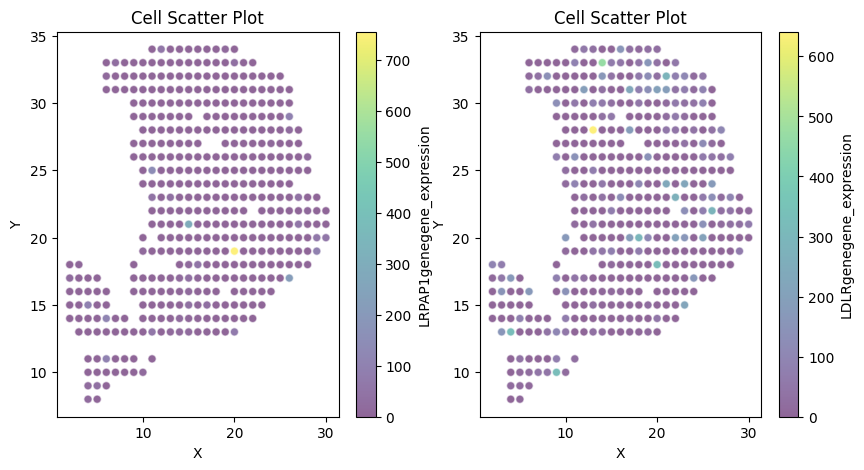

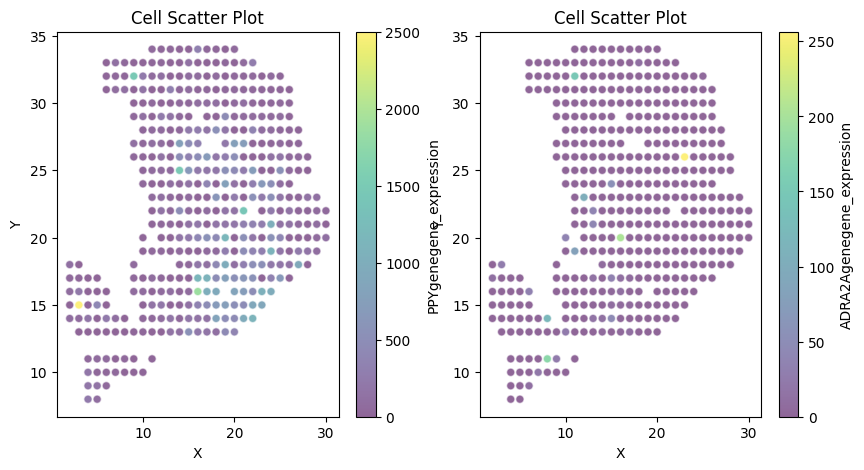

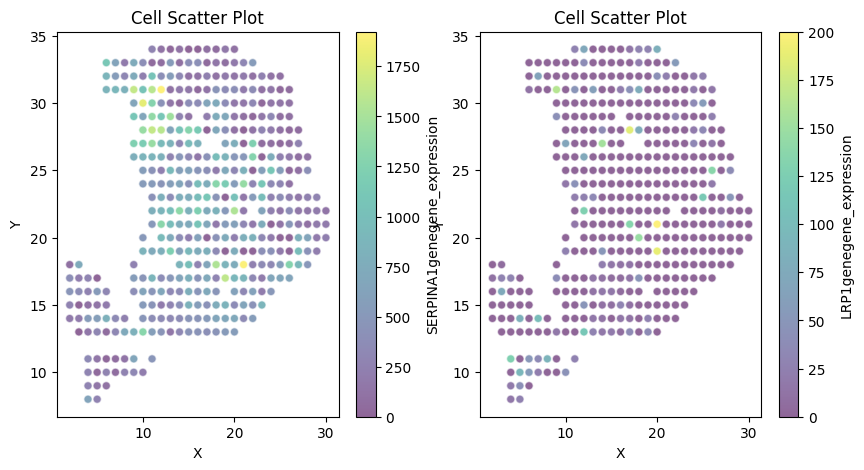

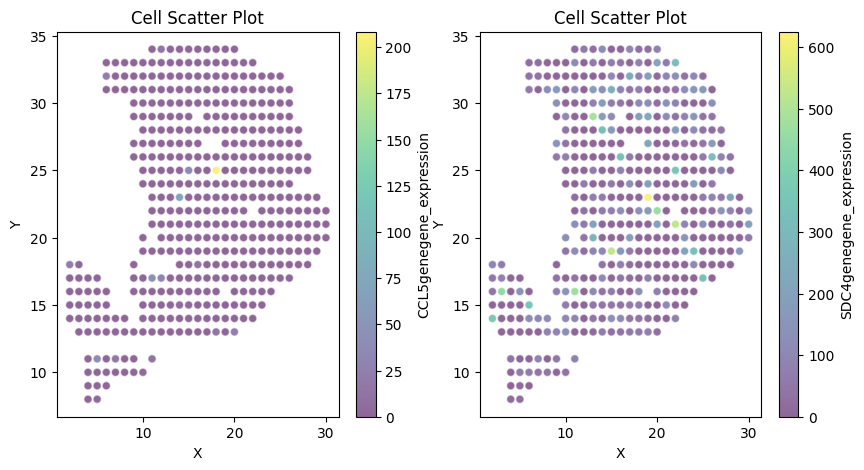

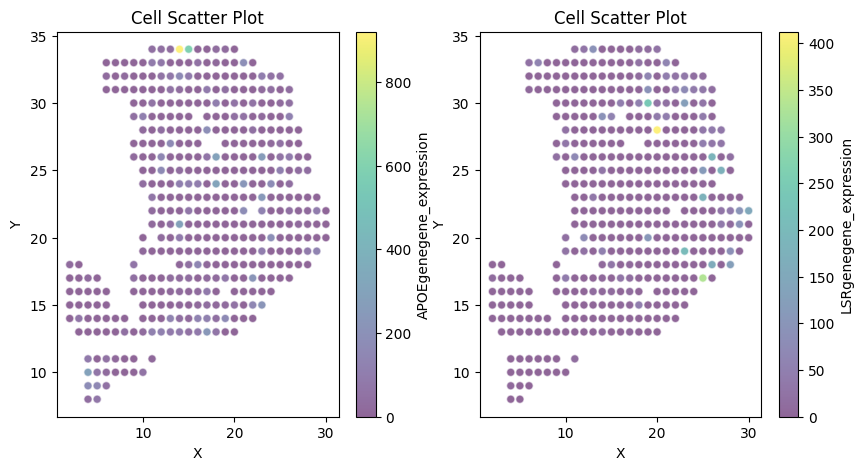

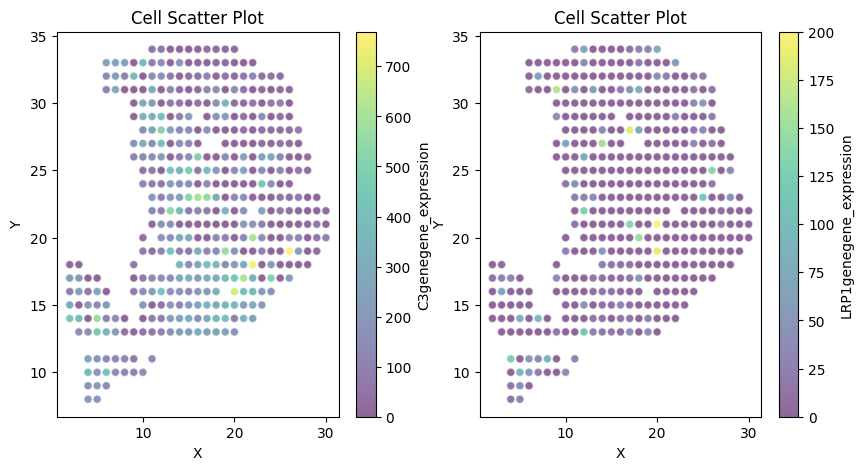

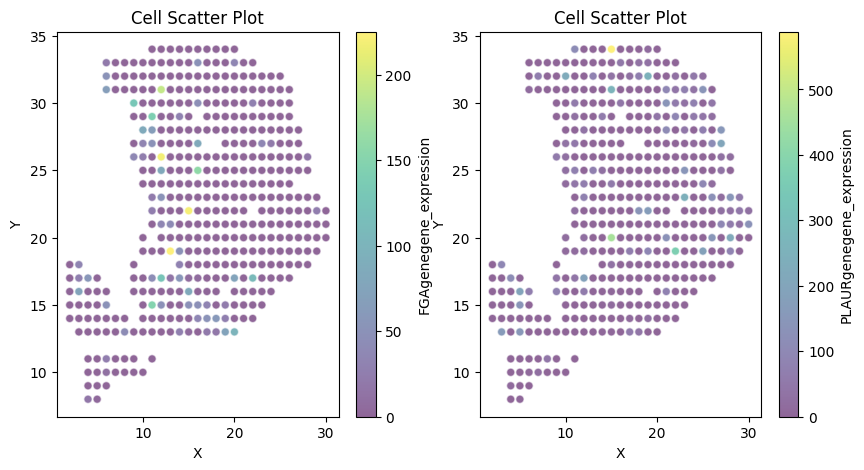

In [69]:
# print(precision_intersection_sorted.shape)
for index,row in precision_intersection_sorted.iloc[-10:, [0, 1]].iterrows():
    ligand_AL = row['ligand']
    receptor_AR = row['receptor']
    # print(ligand_AL,receptor_AR)


    plt.figure(figsize=(10, 5)) 

    plt.subplot(1,2,1)
    plt.scatter(merged_data_AL['x'], merged_data_AL['y'], c=merged_data_AL[ligand_AL], cmap='viridis', alpha=0.6, edgecolors='w')  
    # 添加标题和坐标轴标签  
    plt.title('Cell Scatter Plot')  
    plt.xlabel('X')  
    plt.ylabel('Y')  
    plt.colorbar(label=ligand_AL+'genegene_expression')  # 添加颜色条以显示颜色与基因表达值的对应关系

    plt.subplot(1,2,2)
    plt.scatter(merged_data_AR['x'], merged_data_AR['y'], c=merged_data_AR[receptor_AR], cmap='viridis', alpha=0.6, edgecolors='w')  
    # 添加标题和坐标轴标签  
    plt.title('Cell Scatter Plot')  
    plt.xlabel('X')  
    plt.ylabel('Y')  
    plt.colorbar(label=receptor_AR+'genegene_expression')  # 添加颜色条以显示颜色与基因表达值的对应关系  

    plt.show()
    

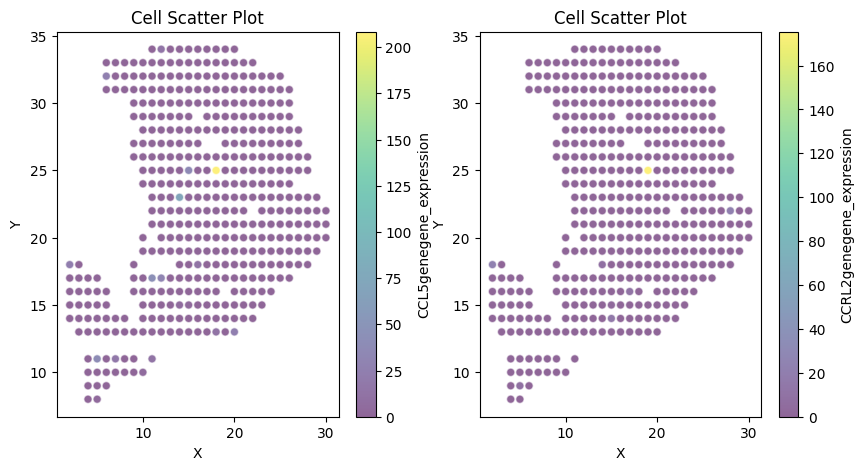

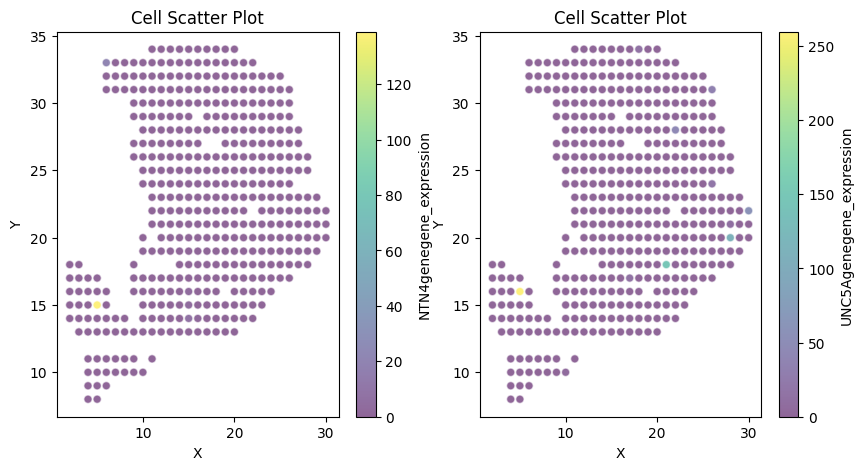

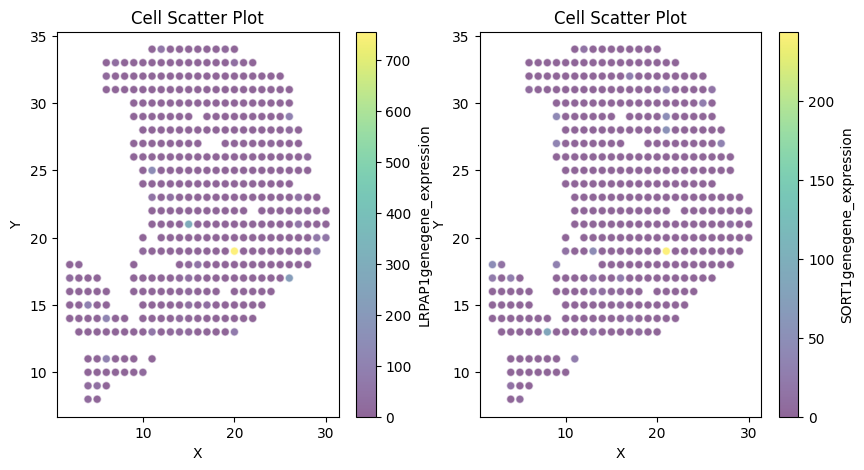

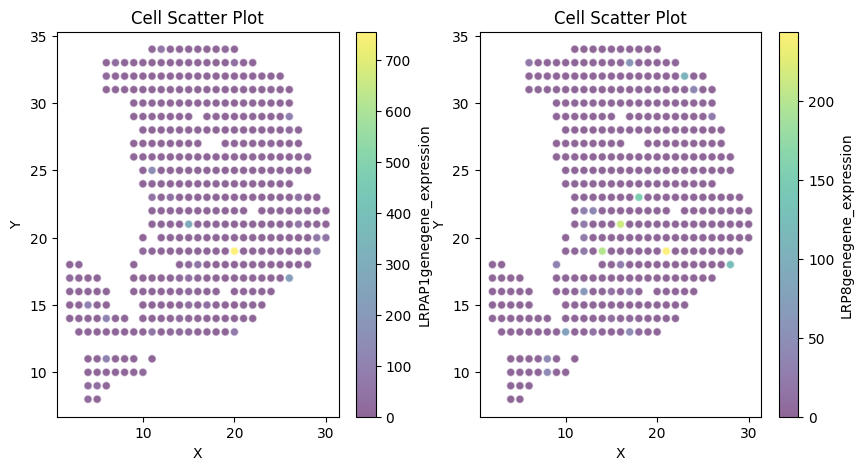

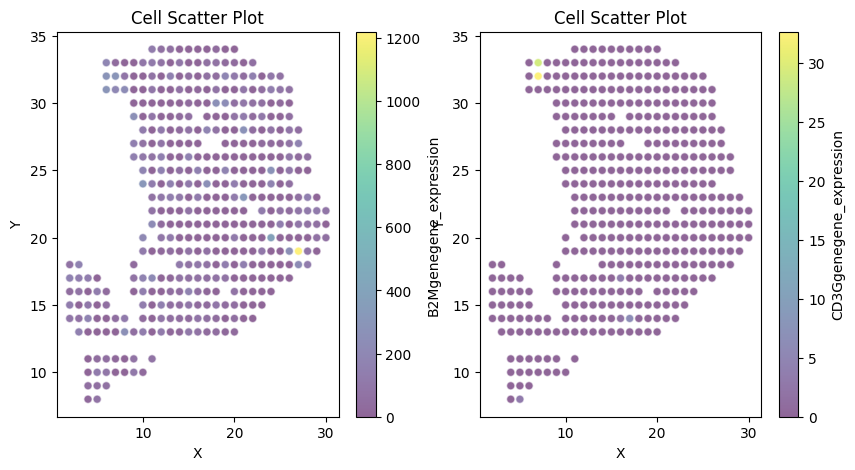

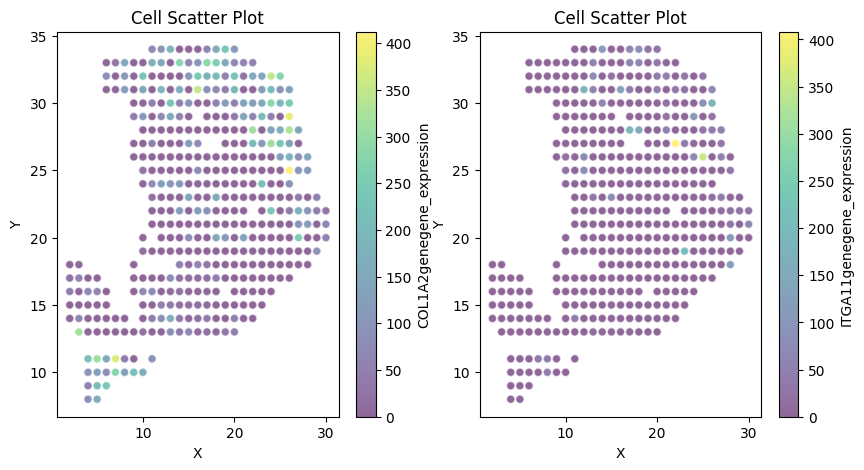

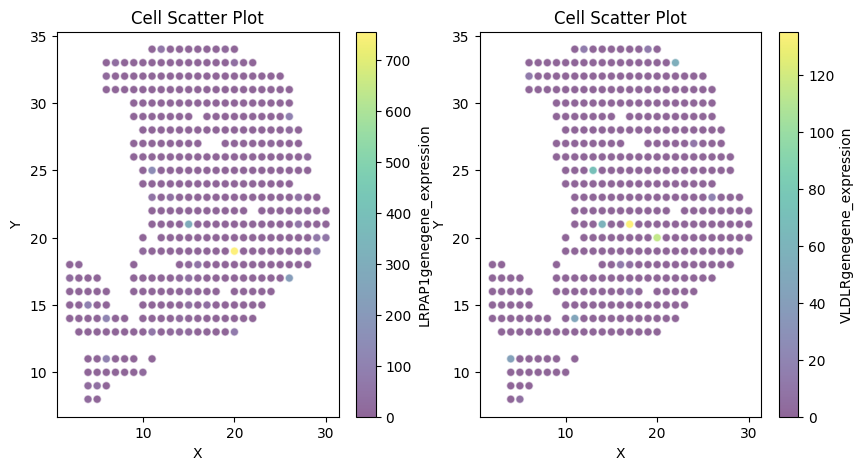

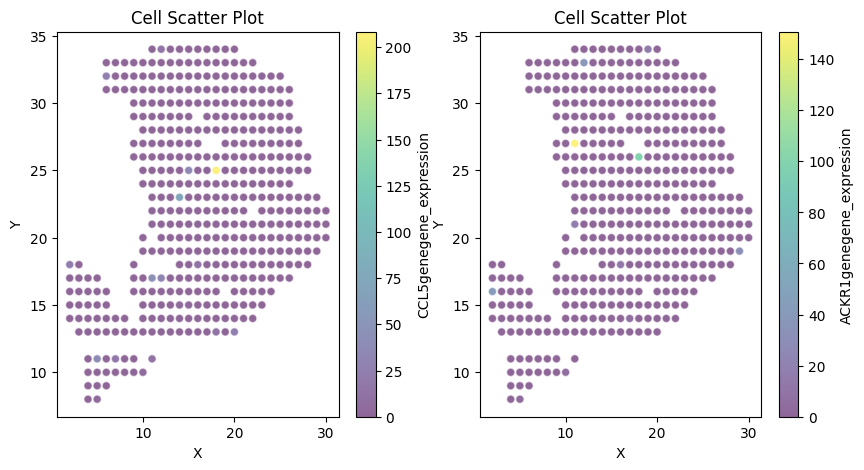

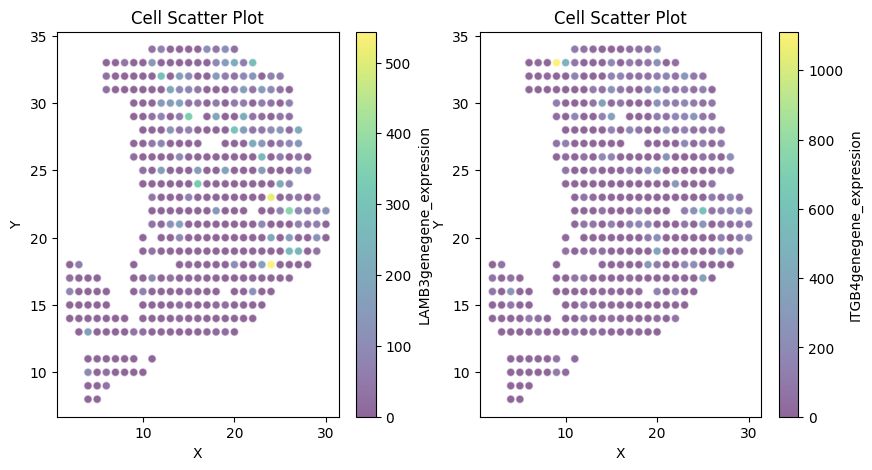

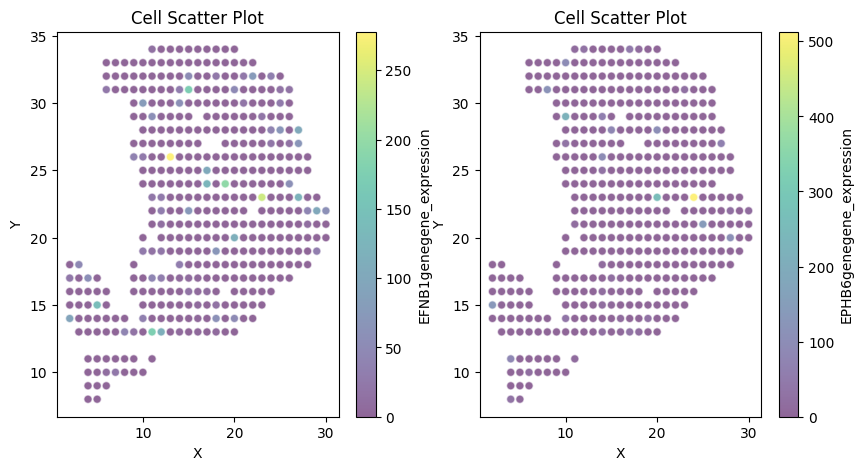

In [71]:
# print(precision_intersection_sorted.shape)
for index,row in precision_intersection_sorted.iloc[:10, [0, 1]].iterrows():
    ligand_AL = row['ligand']
    receptor_AR = row['receptor']
    # print(ligand_AL,receptor_AR)


    plt.figure(figsize=(10, 5)) 

    plt.subplot(1,2,1)
    plt.scatter(merged_data_AL['x'], merged_data_AL['y'], c=merged_data_AL[ligand_AL], cmap='viridis', alpha=0.6, edgecolors='w')  
    # 添加标题和坐标轴标签  
    plt.title('Cell Scatter Plot')  
    plt.xlabel('X')  
    plt.ylabel('Y')  
    plt.colorbar(label=ligand_AL+'genegene_expression')  # 添加颜色条以显示颜色与基因表达值的对应关系

    plt.subplot(1,2,2)
    plt.scatter(merged_data_AR['x'], merged_data_AR['y'], c=merged_data_AR[receptor_AR], cmap='viridis', alpha=0.6, edgecolors='w')  
    # 添加标题和坐标轴标签  
    plt.title('Cell Scatter Plot')  
    plt.xlabel('X')  
    plt.ylabel('Y')  
    plt.colorbar(label=receptor_AR+'genegene_expression')  # 添加颜色条以显示颜色与基因表达值的对应关系  

    plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.covariance import GraphicalLassoCV
from matplotlib_venn import venn2  
import matplotlib.pyplot as plt 

In [ ]:
A1_matrix_AL = pd.read_csv(r'A1_matrix_AL.csv', index_col=0)
A1_matrix_BL = pd.read_csv(r'A1_matrix_BL.csv', index_col=0)
A1_matrix_AR = pd.read_csv(r'A1_matrix_AR.csv', index_col=0)
A1_matrix_BR = pd.read_csv(r'A1_matrix_BR.csv', index_col=0)

# 初始化相关系数矩阵  
correlation_A1_matrix_AL_BR = np.zeros((A1_matrix_AL.shape[1], A1_matrix_BR.shape[1]))  
correlation_A1_matrix_AR_BL = np.zeros((A1_matrix_AR.shape[1], A1_matrix_BL.shape[1]))  

# 遍历AL矩阵的每一列  
for i in range(A1_matrix_AL.shape[1]):  
    # 遍历BR矩阵的每一列  
    for j in range(A1_matrix_BR.shape[1]):  
        # 计算两列之间的相关系数  
        correlation_coefficient = np.corrcoef(A1_matrix_AL.iloc[:, i].values, A1_matrix_BR.iloc[:, j].values)[0][1]  
        # 将计算出的相关系数存储在相关系数矩阵中  
        correlation_A1_matrix_AL_BR[i, j] = correlation_coefficient  
  
# 遍历AR矩阵的每一列  
for i in range(A1_matrix_AR.shape[1]):  
    # 遍历BR矩阵的每一列  
    for j in range(A1_matrix_BL.shape[1]):  
        # 计算两列之间的相关系数  
        correlation_coefficient = np.corrcoef(A1_matrix_AR.iloc[:, i].values, A1_matrix_BL.iloc[:, j].values)[0][1]  
        # 将计算出的相关系数存储在相关系数矩阵中  
        correlation_A1_matrix_AR_BL[i, j] = correlation_coefficient  

A1_AL_BR = pd.DataFrame(correlation_A1_matrix_AL_BR, columns=A1_matrix_BR.columns, index=A1_matrix_AL.columns)
A1_AR_BL = pd.DataFrame(correlation_A1_matrix_AR_BL, columns=A1_matrix_BL.columns, index=A1_matrix_AR.columns)
# print(AL_BR)

# 如果需要，可以将相关系数矩阵保存到CSV文件  
A1_AL_BR.to_csv('A1_AL_BR.csv')
A1_AR_BL.to_csv('A1_AR_BL.csv')



A1_matrix_AL, A1_matrix_BL = A1_matrix_AL.align(A1_matrix_BL, axis=1)

correlation_matrix = A1_matrix_AL.T.corrwith(A1_matrix_BL.T)

correlation_df = correlation_matrix.to_frame('Correlation')
# print(correlation_df) 

correlation_square_matrix = A1_matrix_AL.corr().reindex(index=A1_matrix_BL.columns, columns=A1_matrix_AL.columns)  
correlation_square_matrix = correlation_square_matrix.loc[A1_matrix_BL.columns, :]
print('列与列之间的相关性')
print(correlation_square_matrix)

correlation_square_matrix.to_csv('A1_AL_BL.csv')



A1_matrix_AR, A1_matrix_BR = A1_matrix_AR.align(A1_matrix_BR, axis=1)
correlation_square_matrix = A1_matrix_AR.corr().reindex(index=A1_matrix_BR.columns, columns=A1_matrix_AR.columns)  
correlation_square_matrix = correlation_square_matrix.loc[A1_matrix_BR.columns, :]
print('列与列之间的相关性')
print(correlation_square_matrix)

correlation_square_matrix.to_csv('A1_AR_BR.csv')

In [5]:
A1_matrix_AL_BL = pd.read_csv(r'A1_AL_BL.csv',index_col=0)
A1_matrix_AR_BR = pd.read_csv(r'A1_AR_BR.csv',index_col=0)
A1_matrix_AL_BR = pd.read_csv(r'A1_AL_BR.csv',index_col=0)
A1_matrix_AR_BL = pd.read_csv(r'A1_AR_BL.csv',index_col=0)

A1_ALBLARBL = [A1_matrix_AL_BL,A1_matrix_AR_BL]
A1_ALBRARBR = [A1_matrix_AL_BR,A1_matrix_AR_BR]

A1_matrix_AL_BL_AR_BL = pd.concat(A1_ALBLARBL)
A1_matrix_AL_BR_AR_BR = pd.concat(A1_ALBRARBR)

A1_AB_ALL = [A1_matrix_AL_BL_AR_BL,A1_matrix_AL_BR_AR_BR]
A1_matrix_AB_ALL = pd.concat(A1_AB_ALL, axis=1)

print(A1_matrix_AB_ALL.shape)

A1_matrix_AB_ALL.fillna(0.0001, inplace=True)

A1_matrix_AB_ALL.to_csv('A1_AB_ALL.csv')

(1126, 1126)


In [ ]:
glasso_cv = GraphicalLassoCV(alphas=4, cv=5, n_refinements=4)

A1_matrix_ABALL = pd.read_csv(r'A1_AB_ALL.csv',index_col=0)

glasso_cv.fit(A1_matrix_ABALL)

precision_matrix = glasso_cv.precision_  
covariance_matrix = glasso_cv.covariance_

precision_matrix_CSV = pd.DataFrame(precision_matrix)
precision_matrix_CSV.to_csv('A1_precision_matrix.csv')

print(precision_matrix)
print(precision_matrix.shape)

In [8]:
LR_DF_overall = pd.read_csv(r'lr_df_overall.csv', index_col=0)
print(LR_DF_overall.shape)

(3398, 4)
